In [40]:
from EMCost import *
import pennylane as qlm
jax.config.update("jax_enable_x64", True)

num_input_qubits=8
output_qubits=num_input_qubits
n_trash_qubits=0
operator_support=[1,2,3]
operator_support_probs=[1., 1., 1.]
operator_translation_invariance_Q=False
operator_support_max_range=[1, 5, 3]

set_global( num_input_qubits,
            output_qubits,
            n_trash_qubits,
            operator_support,
            operator_support_probs,
            operator_translation_invariance_Q,
            operator_support_max_range,
            use_jax=False)

dvc = qml.device('default.mixed', wires=num_input_qubits, shots=None)

@qml.qnode(dvc,interface='jax')
def trainer(w,dm):
    qml.QubitDensityMatrix(dm, wires=dvc.wires)
    return qml.state()
input_states=[]


In [ ]:
res=[]
X=[]
u=5
def get_basis(n):
    a = [0]*(2**num_input_qubits)
    a[n]=1
    return jnp.array(a)

input_states=get_basis(u)
inputs=jnp.outer(input_states, input_states)
# for i in range(2**num_input_qubits):
for i in range(0,2**num_input_qubits):
    a = [0]*(2**num_input_qubits)
    a[i]=1
    print(f'comparing b= [{list(map(int,(format(u, f'0{num_input_qubits}b'))))}] and a = [{list(map(int,(format(i, f'0{num_input_qubits}b'))))}]')

    b=jnp.array(a)
    b=jnp.outer(b, b)
    f =cost_fn_EM([b],trainer,[inputs])
    res.append((f'{list(map(int,(format(i, '04b'))))}',float(f([0]))))


# print(format(a,f'0{num_input_qubits}b'),format(b,f'0{num_input_qubits}b'))

# cost_fn_EM(input_states,trainer,input_states)


comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 0, 0, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 0, 0, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 0, 1, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 0, 1, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 1, 0, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 1, 0, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 1, 1, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 0, 1, 1, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 1, 0, 0, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 1, 0, 0, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 1, 0, 1, 0]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 1, 0, 1, 1]]
comparing b= [[0, 0, 0, 0, 0, 1, 0, 1]] and a = [[0, 0, 0, 0, 1, 1, 0, 0]]
comparing b= [[0, 0, 0, 0

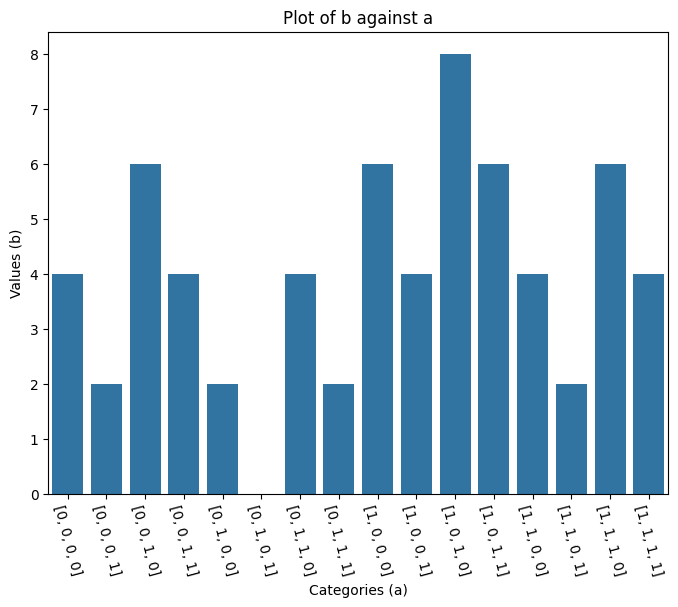

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.DataFrame(res, columns=['a', 'b'])

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='a', y='b', estimator=sum)  # Use sum, mean, etc. as needed
plt.xticks(rotation=-75)

# Label the axes
plt.xlabel('Basis (a)')
plt.ylabel('EM_distance (b)')
plt.title('Plot of b against a')

# Show the plot
plt.show()
